# Data Cleaning

## Team : 14 (Vidisha, Yijin, Yvette)


#### Newly defined questions:

**1. Can socio-economic features such as race, gender, family income, sexual orientation, marital status, and region predict 1) anxiety disorder (ANXEV_A), 2) depression (DEPEV_A), 3) difficulty participating in social activities?**
- Classification (KNN, Naive Bayes) or Logistic Regression


**2. Can features related to physical health conditions such as diabetes, cardiovascular disease, chronic disease, sleep quality, as well as habits such as alcohol consumption, cigarette consumption, or physical activities, predict 1) frequency of feeling worried, nervous, or anxious (ANXFREQ_A), 2) frequency of feeling depressed (DEPFREQ_A)?**
- Classification (KNN, Naive Bayes) or Logistic Regression

**3. Can socio-economic features predict whether an individual will seek mental health treatment?**
- Classification (KNN, Naive Bayes) or Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
survey = pd.read_csv('adult20.csv') # Reading Data for 2020

survey

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,RJWKCLSOFT_A,RJWCLSNOSD_A,RJWRKCLSSD_A,RECJOBSD_A,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,HHX,POVRATTC_A
0,3,14,5,0,100000,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,11,10,4526.109,H066706,6.47
1,3,11,4,0,75000,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,8,10,12809.039,H034928,3.64
2,3,14,4,0,90000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,8,10,10322.534,H018289,6.76
3,3,11,3,0,65000,0,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1,1,3,10,7743.375,H006876,3.79
4,3,8,1,0,25762,2,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,6,10,4144.724,H028842,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31563,4,13,4,0,79000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,2,10,2857.585,H065697,4.61
31564,4,11,3,0,60000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,2,10,2994.763,H061937,3.50
31565,4,8,1,0,27500,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,2,10,1328.907,H005331,2.24
31566,4,8,3,0,61880,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,2,10,3481.003,H047025,2.38


### Step 1: Dealing with missing values

Since we are using survey data, there are bound to be several missing values in various attributes due to non-response. In order to deal with such missing observations, we consider only those columns in the data set with number of missing values less than 10% of the total observations. 

We consider 10% as a reasonable threshold for a data set with 31,586 observations. For columns with number of missing vales less than 10% of the total observations, we drop the missing values as these are a small proportion of the total observations.

In [3]:
null = survey.isna().sum()/ len(survey) # Proportion of missing values in every attribute
keep = list(null[null < 0.1].index) # Attributes with less than 10% missing observations

survey_cl = survey[keep]

### Remaining Missing Values


In [4]:
percent = null[keep] #quantifying proportion of missing observations
df_miss = pd.DataFrame({'Column Name': keep,
                        'Percent Missing': round(percent * 100, 2)}) #displaying variable name and proportion of missing observations

df_miss.sort_values(by = ['Percent Missing'], ascending = False).reset_index(drop = True).head(20)

,Column Name,Percent Missing
0,WLK13M_A,9.37
1,WLK100_A,8.79
2,STEPS_A,8.79
3,USPLKIND_A,8.14
4,WRKHLTHFC_A,7.82
5,HINOTYR_A,7.23
6,INCSSRR_A,3.71
7,INCOTHR_A,3.71
8,INCRETIRE_A,3.71
9,INCWELF_A,3.71


In [5]:
df_org = survey_cl.dropna().reset_index(drop = True) #Dropping missing values in remaining variables
print("Number of Missing Values: %1.0f"%df_org.isnull().sum().sum())

Number of Missing Values: 0


In [6]:
df_org.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,CHLEV_A,HYPEV_A,PHSTAT_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,HHX,POVRATTC_A
0,3,14,5,0,100000,0,2,103,2,1,...,2,2,2,1,1,11,10,4526.109,H066706,6.47
1,3,11,3,0,65000,0,2,103,1,1,...,2,2,1,1,1,3,10,7743.375,H006876,3.79
2,3,9,2,0,36000,0,2,103,2,1,...,1,1,4,1,1,6,10,3164.668,H004811,2.93
3,3,3,1,0,30105,2,2,103,2,1,...,2,2,2,8,1,6,10,8423.396,H068043,0.98
4,2,2,1,0,9000,1,2,115,3,2,...,2,2,4,1,1,12,10,3231.773,H028696,0.73


### Step 2: Removing irrelevant columns

Our original dataset included over 200 variables. In this step, we manually selected variables using the dataset codebook (https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NHIS/2020/adult-codebook.pdf) and created a csv file (relevant_variables.csv) with all the variables relevant for our study topic. We decided to take this approach given the large number of variables that were similar. For example, there were several variables related to food insecurity (e.g., Couldn't afford to eat balanced meals; food didn't last; worry food would run out;receive food stamps, past 12m). For each group of similar variables, we chose the one captured the most information.

We also chose to manually select our remaining variables since there were many features irrelevant to our research questions. We chose to manually eliminate these variables as well.

In [7]:
rv = pd.read_excel('relevant_variables.xlsx') 
df_r = df_org[list(rv["Variable Names"])]

print(df_r.describe())
df_r.head(10)

             AGEP_A       ANXEV_A     ANXFREQ_A      ANXMED_A      ARTHEV_A  \
count  21890.000000  21890.000000  21890.000000  21890.000000  21890.000000   
mean      54.106898      1.859479      3.616583      1.879488      1.755505   
std       17.604185      0.408785      1.368223      0.395050      0.485406   
min       18.000000      1.000000      1.000000      1.000000      1.000000   
25%       40.000000      2.000000      3.000000      2.000000      1.000000   
50%       56.000000      2.000000      4.000000      2.000000      2.000000   
75%       68.000000      2.000000      5.000000      2.000000      2.000000   
max       99.000000      9.000000      9.000000      9.000000      9.000000   

           BMICAT_A       CHDEV_A       CHLEV_A   COGMEMDFF_A      COPDEV_A  \
count  21890.000000  21890.000000  21890.000000  21890.000000  21890.000000   
mean       3.080219      1.958657      1.691000      1.181270      1.957972   
std        1.172404      0.357119      0.571848    

,AGEP_A,ANXEV_A,ANXFREQ_A,ANXMED_A,ARTHEV_A,BMICAT_A,CHDEV_A,CHLEV_A,COGMEMDFF_A,COPDEV_A,...,SEX_A,SLPFLL_A,SLPHOURS_A,SLPREST_A,SLPSTY_A,SMKCIGST_A,SOCSCLPAR_A,STRFREQW_A,URBRRL,VIGFREQW_A
0,85,2,5,2,2,2,2,2,2,2,...,1,2,9,4,1,4,1,94,3,94
1,32,2,3,2,2,2,2,2,1,2,...,1,1,8,3,2,4,1,3,3,5
2,70,2,4,2,1,3,2,1,1,2,...,2,2,7,2,2,4,1,2,3,94
3,32,2,1,2,2,4,2,2,1,2,...,2,1,8,1,1,4,1,94,3,94
4,77,2,5,2,2,9,2,2,1,2,...,2,2,8,2,2,4,1,94,2,94
5,71,2,5,2,2,3,2,2,1,2,...,1,1,8,4,1,4,1,94,2,94
6,60,2,1,2,1,3,2,2,1,2,...,2,4,7,2,2,4,1,94,2,94
7,62,2,5,2,1,4,2,2,1,2,...,1,1,6,4,1,4,1,94,2,94
8,58,2,4,2,2,3,2,2,1,2,...,2,2,6,3,2,4,1,94,4,2
9,56,1,3,1,1,4,2,2,1,2,...,1,1,6,3,1,3,1,94,4,0


### Step 3: Transforming Categorical Variables

Below, we convert the categorical features into dummy variables.

In [8]:
#check which variables are categorical
rv_cat = rv[rv['Type'] == 'Categorical']

df_cat = df_r[rv_cat['Variable Names'].tolist()]
print("Data Type of the categorical variables (Before cleaning)\n")
print('=' * 22)
print(df_cat.dtypes)
print('=' * 22)

# Note that INCWELF_A atypically has floating values
# Reset the data type as integer
df_cate = df_r.astype({'INCWELF_A':'int64'})
print("\nData Type of all variables (After cleaning)\n")
print('=' * 22)
print(df_cate.dtypes)
print('=' * 22)

Data Type of the categorical variables (Before cleaning)

ARTHEV_A          int64
BMICAT_A          int64
CHDEV_A           int64
CHLEV_A           int64
COGMEMDFF_A       int64
COPDEV_A          int64
DEMENEV_A         int64
DIBEV_A           int64
DRKSTAT_A         int64
EDUC_A            int64
EMERG12MTC_A      int64
FGEFRQTRD_A       int64
FUNWLK_A          int64
HYPEV_A           int64
INCGRP_A          int64
INCWELF_A       float64
MARSTAT_A         int64
MHTHRPY_A         int64
NOTCOV_A          int64
ORIENT_A          int64
PEOPLEWLK_A       int64
RACEALLP_A        int64
REGION            int64
SCHCURENR_A       int64
SEX_A             int64
SLPFLL_A          int64
SLPREST_A         int64
SLPSTY_A          int64
SMKCIGST_A        int64
URBRRL            int64
dtype: object

Data Type of all variables (After cleaning)

AGEP_A          int64
ANXEV_A         int64
ANXFREQ_A       int64
ANXMED_A        int64
ARTHEV_A        int64
BMICAT_A        int64
CHDEV_A         int64
CHLEV_A 

In [9]:
for col in list(df_cat):
    print(df_cat[col].value_counts())
    print('\n')

2    16360
1     5505
9       14
7       11
Name: ARTHEV_A, dtype: int64


3    7707
2    6871
4    6593
9     434
1     285
Name: BMICAT_A, dtype: int64


2    20693
1     1158
9       29
7       10
Name: CHDEV_A, dtype: int64


2    14754
1     7087
9       39
7       10
Name: CHLEV_A, dtype: int64


1    18312
2     3237
3      329
9        5
7        4
4        3
Name: COGMEMDFF_A, dtype: int64


2    20808
1     1059
9       12
7       11
Name: COPDEV_A, dtype: int64


2    21748
1      130
7       10
9        2
Name: DEMENEV_A, dtype: int64


2    19766
1     2106
7       11
9        7
Name: DIBEV_A, dtype: int64


6     6973
7     4149
5     2884
2     2215
1     2153
3     1708
8     1469
9      236
10      97
4        6
Name: DRKSTAT_A, dtype: int64


8     5532
4     4547
5     3471
9     2885
7     2007
1     1056
6      837
11     499
3      389
10     327
2      273
99      32
0       26
97       9
Name: EDUC_A, dtype: int64


0    18245
1     2482
2      812
3      169
4 

In [10]:
# Non-reporting values in the categorical variables:
# 7: Refused
# 8: Not Ascertained
# 9: Don't know
# Not informative if included in the model
# Therefore, drop them or integrate these 3 classes into 1 with a value of 0

# First, make sure there is no '0' value that has statistical meaning
max = df_cat.describe().loc['max'].max()
print('Among categorical variables, the maximum value with statistical meaning is:', max)

# In the codebook, we know that:
# EDUC_A = 0: 
#   Variable Description: Educational level of sample adult
#   Category Description: Never attended/kindergarten only
#            Frequency  : 59
#            Percent    : 0.2

df_cate[rv_cat['Variable Names'].tolist()] = df_cate[rv_cat['Variable Names'].tolist()].replace([7, 8, 9], 100)

df_category = df_cate.replace([97, 98, 99], 100)

Among categorical variables, the maximum value with statistical meaning is: 99.0


In [11]:
# Transform into dummy variables
df = pd.get_dummies(df_category, columns = df_cat.columns.tolist(), drop_first = True)

df

,AGEP_A,ANXEV_A,ANXFREQ_A,ANXMED_A,DEPEV_A,DEPFREQ_A,DEPMED_A,FAMINCTC_A,MODFREQW_A,SLPHOURS_A,...,SLPSTY_A_4,SLPSTY_A_100,SMKCIGST_A_2,SMKCIGST_A_3,SMKCIGST_A_4,SMKCIGST_A_5,SMKCIGST_A_100,URBRRL_2,URBRRL_3,URBRRL_4
0,85,2,5,2,2,5,2,100000,94,9,...,0,0,0,0,1,0,0,0,1,0
1,32,2,3,2,2,5,2,65000,5,8,...,0,0,0,0,1,0,0,0,1,0
2,70,2,4,2,1,1,1,36000,7,7,...,0,0,0,0,1,0,0,0,1,0
3,32,2,1,2,2,3,2,30105,1,8,...,0,0,0,0,1,0,0,0,1,0
4,77,2,5,2,2,5,2,9000,94,8,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,56,2,4,2,1,4,2,85000,1,8,...,0,0,0,1,0,0,0,0,0,1
21886,60,2,4,2,1,2,1,34000,5,7,...,0,0,0,1,0,0,0,0,0,1
21887,55,2,4,2,2,4,2,60000,3,8,...,0,0,0,0,1,0,0,0,0,1
21888,66,2,4,2,2,5,2,27500,94,6,...,0,0,0,1,0,0,0,0,0,1


### Step 5: Visualization

**1) Boxplot: Distribution of age in terms of different levels of anxiety/depression**

Text(0, 0.5, '')

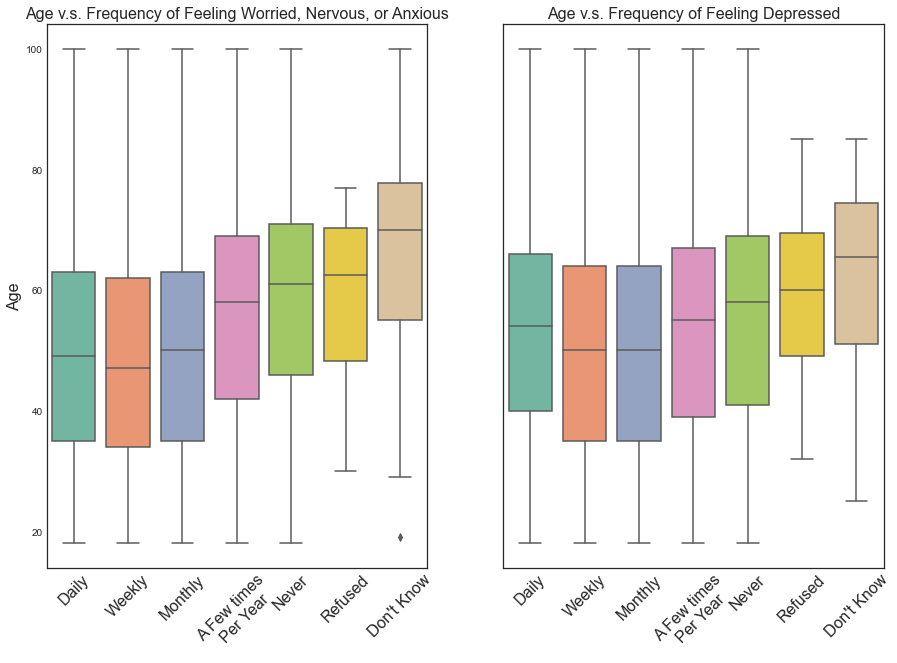

In [18]:
# Draw a boxplot to show the distribution of age against frequency of feeling anxious/depression
fig, axes = plt.subplots(1, 2, figsize = (15, 10), sharey = True)
xlabel = ('Daily', 'Weekly', 'Monthly',
          'A Few times\n Per Year', 'Never', 
          'Refused', 'Don\'t Know')

# Age vs Frequency of Feeling Worried, Nervous, or Anxious
sns.boxplot(x = 'ANXFREQ_A', y = 'AGEP_A', data = df_category, palette = "Set2", ax = axes[0])
axes[0].set_title('Age v.s. Frequency of Feeling Worried, Nervous, or Anxious', fontdict = {'size': 16})
axes[0].set_xticklabels(xlabel, fontdict = {'size': 16}, rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Age', fontdict = {'size': 16})

# Age vs Frequency of Feeling Depressed
sns.boxplot(x = 'DEPFREQ_A', y = 'AGEP_A', data = df_category, palette = "Set2", ax = axes[1])
axes[1].set_title('Age v.s. Frequency of Feeling Depressed', fontdict = {'size': 16})
axes[1].set_xticklabels(xlabel, fontdict = {'size': 16}, rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

**From the boxplot, we can conclude that:**

[1] People in their early 50s are more likely to suffer from higher anxiety and depression compared to other age groups.

[2] Younger people tend to have a higher frequency of feeling related to anxiety and depression.

---

**2) Countplot: Distribution of Depression by Sex**

- The sample adults has once been told by a doctor or other health professional that they had some type of depression

([<matplotlib.axis.XTick at 0x217f7ba7be0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

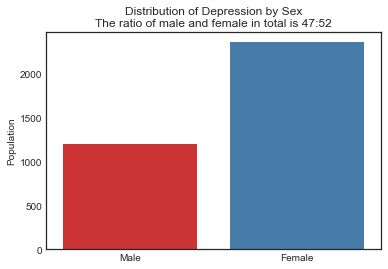

In [17]:
# Subset the sample adults who has once been diagnosed with depression
df_depression = df_category[df_category['DEPEV_A'] == 1]

# Check if the distribution of sex is balanced in the original dataset
male = len(df_category['SEX_A'][df_category['SEX_A'] == 1])
female = len(df_category['SEX_A'][df_category['SEX_A'] == 2])

# Draw the barplox
sns.countplot(x = df_depression['SEX_A'][df_depression['SEX_A'] != 100], palette = "Set1")
plt.title('Distribution of Depression by Sex\n'+'The ratio of male and female in total is '+
                  str(int(male/(male+female)*100))+':'+str(int(female/(male+female)*100)))
plt.xlabel('')
plt.ylabel('Population')
plt.xticks([0,1], ['Male','Female'])

**From the barplot, we can conclude that:**

[1] The distribution of sex in the original dataset is almost balanced (Male : Female = 47:52)

[2] Given [1], in the countplot, female group has a population which is 2x of male group.

[3] Therefore, females have a siginificant higher rate of getting depression.

---

**Yijin: Correlation Matrix/ Heatmap**

### Step 6: Preliminary Test

**Vidisha: train one model**